<a href="https://colab.research.google.com/github/WooMongGae/oss2025/blob/main/%EA%B8%80%EB%A1%9C%EB%B2%8C_%EC%9D%8C%EC%95%85_%ED%8A%B8%EB%A0%8C%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modified column list: Index(['user_id', 'age', 'country', 'streaming platform', 'top genre',
       'minutes streamed per day', 'number of songs liked',
       'most played artist', 'subscription type',
       'listening time (morning/afternoon/night)',
       'discover weekly engagement (%)', 'repeat song rate (%)'],
      dtype='object')


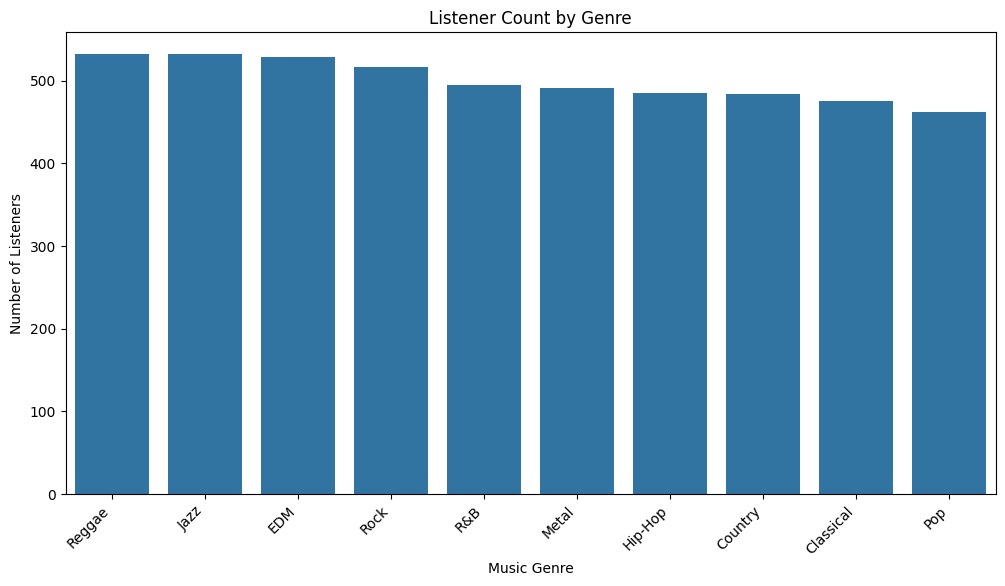

Listener Count by Genre:
   Music Genre  Number of Listeners
0      Reggae                  532
1        Jazz                  532
2         EDM                  528
3        Rock                  516
4         R&B                  495
5       Metal                  491
6     Hip-Hop                  485
7     Country                  484
8   Classical                  475
9         Pop                  462


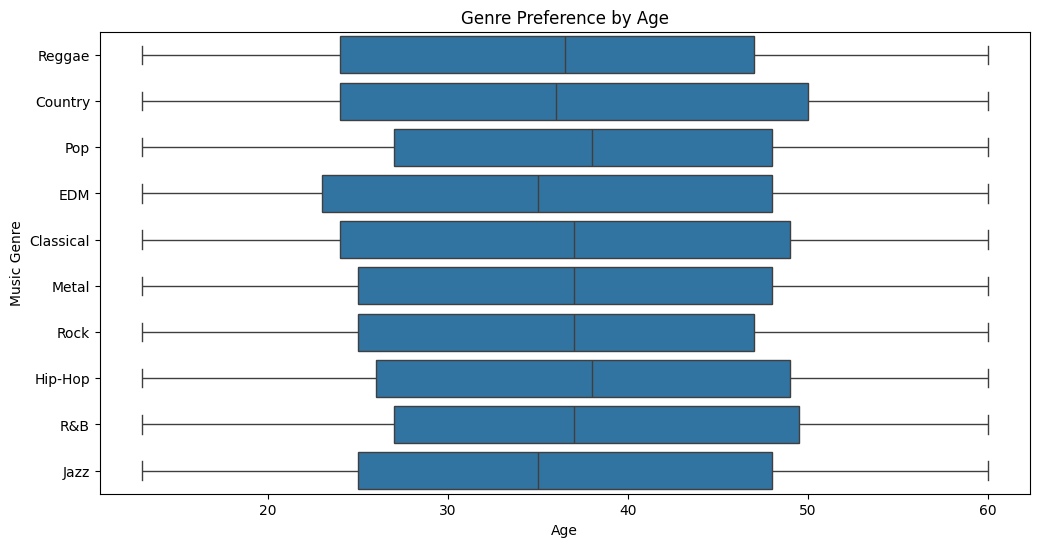

Most Preferred Genre by Age:
     Age Most Preferred Genre
0    13                Metal
1    14                  R&B
2    15                  EDM
3    16            Classical
4    17                 Jazz
5    18              Hip-Hop
6    19                 Jazz
7    20               Reggae
8    21                  EDM
9    22                  EDM
10   23               Reggae
11   24                 Rock
12   25                 Rock
13   26                 Rock
14   27                  Pop
15   28               Reggae
16   29                 Jazz
17   30                Metal
18   31                  Pop
19   32                 Jazz
20   33                  R&B
21   34                  R&B
22   35                 Jazz
23   36                Metal
24   37                 Rock
25   38                  EDM
26   39                Metal
27   40                  Pop
28   41                  Pop
29   42               Reggae
30   43              Country
31   44               Reggae
32   45      

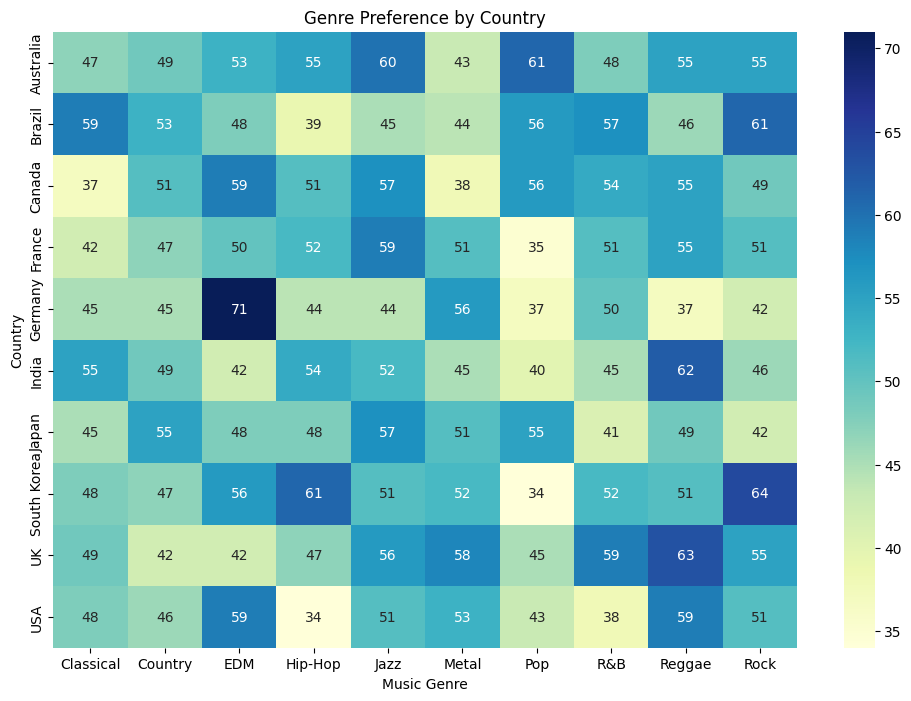

Genre Preference by Country:
 top genre      country  Classical  Country  EDM  Hip-Hop  Jazz  Metal  Pop  \
0            Australia         47       49   53       55    60     43   61   
1               Brazil         59       53   48       39    45     44   56   
2               Canada         37       51   59       51    57     38   56   
3               France         42       47   50       52    59     51   35   
4              Germany         45       45   71       44    44     56   37   
5                India         55       49   42       54    52     45   40   
6                Japan         45       55   48       48    57     51   55   
7          South Korea         48       47   56       61    51     52   34   
8                   UK         49       42   42       47    56     58   45   
9                  USA         48       46   59       34    51     53   43   

top genre  R&B  Reggae  Rock  
0           48      55    55  
1           57      46    61  
2           54    

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 읽기
try:
    df = pd.read_csv('/content/Global_Music_Streaming_Listener_Preferences.csv', encoding='latin1')
except FileNotFoundError:
    print("File not found. Check the file path.")
    exit()
except pd.errors.ParserError:
    print("CSV parsing error. Check the file format.")
    exit()

# 컬럼 이름 공백 제거 및 소문자로 변환
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

# 데이터 컬럼 확인
print("Modified column list:", df.columns)

# Chart 1: Listener count by genre
plt.figure(figsize=(12, 6))
if 'top genre' in df.columns:
    sns.countplot(x='top genre', data=df, order=df['top genre'].value_counts().index)
    plt.xticks(rotation=45, ha='right')
    plt.title('Listener Count by Genre')
    plt.xlabel('Music Genre')
    plt.ylabel('Number of Listeners')
    plt.show()

    # 표 출력
    genre_counts = df['top genre'].value_counts().reset_index()
    genre_counts.columns = ['Music Genre', 'Number of Listeners']
    print("Listener Count by Genre:\n", genre_counts)
else:
    print("Column 'top genre' not found.")

# Chart 2: Genre preference by age (Box Plot)
plt.figure(figsize=(12, 6))
if 'age' in df.columns and 'top genre' in df.columns:
    sns.boxplot(x='age', y='top genre', data=df)
    plt.title('Genre Preference by Age')
    plt.xlabel('Age')
    plt.ylabel('Music Genre')
    plt.show()

    # 표 출력
    age_genre_summary = df.groupby('age')['top genre'].agg(lambda x: x.value_counts().index[0]).reset_index()
    age_genre_summary.columns = ['Age', 'Most Preferred Genre']
    print("Most Preferred Genre by Age:\n", age_genre_summary)
else:
    print("Column 'age' or 'top genre' not found.")

# Chart 3: Genre preference by country (Heatmap)
plt.figure(figsize=(12, 8))
if 'country' in df.columns and 'top genre' in df.columns:
    genre_by_country = df.groupby(['country', 'top genre']).size().unstack(fill_value=0)
    sns.heatmap(genre_by_country, cmap='YlGnBu', annot=True, fmt='d')
    plt.title('Genre Preference by Country')
    plt.xlabel('Music Genre')
    plt.ylabel('Country')
    plt.show()

    # 표 출력
    genre_country_summary = genre_by_country.reset_index()
    print("Genre Preference by Country:\n", genre_country_summary)
else:
    print("Column 'country' or 'top genre' not found.")
